In [6]:
import pandas as pd
import numpy as np
#from statsmodels.tsa.seasonal import seasonal_decompose
#from fbprophet import Prophet
#!pip install fbprophet

In [2]:
airline = pd.read_csv('Data/AirPassengers.csv')
airline

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:
airline['Month'] = pd.to_datetime(airline['Month'])
airline.set_index(airline['Month'])
airline.index = airline['Month']
airline

,Month,#Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121
...,...,...
1960-08-01,1960-08-01,606
1960-09-01,1960-09-01,508
1960-10-01,1960-10-01,461


In [4]:
airline = airline.drop('Month',axis=1)

In [5]:
airline

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


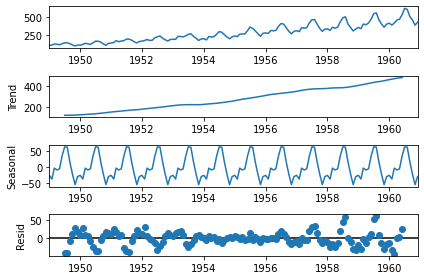

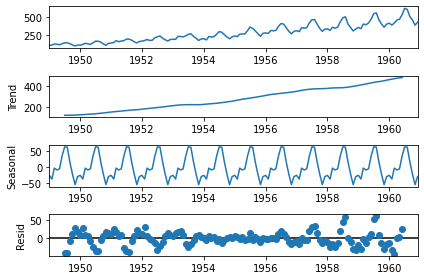

In [6]:
seasonal_decompose(airline).plot()

In [23]:
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential
from azure.ai.ml import automl
from azureml.core import Workspace

In [21]:
subscription_id = '21d5b150-52c7-4b38-8b64-b18cde860fe8'
resource_group = 'practice_test'
workspace_name = 'practice_test'

In [29]:
from azure.identity import DefaultAzureCredential, InteractiveBrowserCredential

try:
    credential = DefaultAzureCredential()
    # Check if given credential can get token successfully.
    credential.get_token("https://management.azure.com/.default")
except Exception as ex:
    # Fall back to InteractiveBrowserCredential in case DefaultAzureCredential not work
    # This will open a browser page for
    credential = InteractiveBrowserCredential()

DefaultAzureCredential failed to retrieve a token from the included credentials.
Attempted credentials:
	EnvironmentCredential: EnvironmentCredential authentication unavailable. Environment variables are not fully configured.
Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
	ManagedIdentityCredential: ManagedIdentityCredential authentication unavailable, no response from the IMDS endpoint.
	SharedTokenCacheCredential: SharedTokenCacheCredential authentication unavailable. No accounts were found in the cache.
	VisualStudioCodeCredential: Failed to get Azure user details from Visual Studio Code.
	AzureCliCredential: Azure CLI not found on path
	AzurePowerShellCredential: Az.Account module >= 2.2.0 is not installed
To mitigate this issue, please refer to the troubleshooting guidelines here at https://aka.ms/azsdk/python/identity/defaultazurecredential/troubleshoot.


In [28]:
#ml_client = MLClient(DefaultAzureCredential(),
#subscription_id = '21d5b150-52c7-4b38-8b64-b18cde860fe8', resource_group_name = 'practice_test', workspace_name = 'practice_test'
#)
credential = DefaultAzureCredential()
ml_client = None
try:
    ml_client = MLClient.from_config(credential)
except Exception as ex:
    print(ex)
    # Enter details of your AML workspace
    subscription_id = subscription_id 
    resource_group =  resource_group
    workspace = workspace_name

    ml_client = MLClient(credential, subscription_id, resource_group, workspace)

We could not find config.json in: . or in its parent directories. Please provide the full path to the config file or ensure that config.json exists in the parent directories.


ValidationException: Both subscription id and resource group are required for this operation, missing subscription id and resource group

In [26]:
workspace = Workspace(subscription_id, resource_group, workspace_name)

Performing interactive authentication. Please follow the instructions on the terminal.


AuthenticationException: AuthenticationException:
	Message: Please ensure you have network connection. Error detail: HTTPSConnectionPool(host='login.microsoftonline.com', port=443): Max retries exceeded with url: /organizations/v2.0/.well-known/openid-configuration (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:1129)')))
	InnerException None
	ErrorResponse 
{
    "error": {
        "code": "UserError",
        "inner_error": {
            "code": "Authentication"
        },
        "message": "Please ensure you have network connection. Error detail: HTTPSConnectionPool(host='login.microsoftonline.com', port=443): Max retries exceeded with url: /organizations/v2.0/.well-known/openid-configuration (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:1129)')))"
    }
}

In [20]:
workspace = ml_client.workspaces.get(name=ml_client.workspace_name)
workspace

DefaultAzureCredential failed to retrieve a token from the included credentials.
Attempted credentials:
	EnvironmentCredential: EnvironmentCredential authentication unavailable. Environment variables are not fully configured.
Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
	ManagedIdentityCredential: ManagedIdentityCredential authentication unavailable, no response from the IMDS endpoint.
	SharedTokenCacheCredential: SharedTokenCacheCredential authentication unavailable. No accounts were found in the cache.
	VisualStudioCodeCredential: Failed to get Azure user details from Visual Studio Code.
	AzureCliCredential: Azure CLI not found on path
	AzurePowerShellCredential: Az.Account module >= 2.2.0 is not installed
To mitigate this issue, please refer to the troubleshooting guidelines here at https://aka.ms/azsdk/python/identity/defaultazurecredential/troubleshoot.


ClientAuthenticationError: DefaultAzureCredential failed to retrieve a token from the included credentials.
Attempted credentials:
	EnvironmentCredential: EnvironmentCredential authentication unavailable. Environment variables are not fully configured.
Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
	ManagedIdentityCredential: ManagedIdentityCredential authentication unavailable, no response from the IMDS endpoint.
	SharedTokenCacheCredential: SharedTokenCacheCredential authentication unavailable. No accounts were found in the cache.
	VisualStudioCodeCredential: Failed to get Azure user details from Visual Studio Code.
	AzureCliCredential: Azure CLI not found on path
	AzurePowerShellCredential: Az.Account module >= 2.2.0 is not installed
To mitigate this issue, please refer to the troubleshooting guidelines here at https://aka.ms/azsdk/python/identity/defaultazurecredential/troubleshoot.

In [15]:
workspace = ml_client.workspaces.get(name=ml_client.workspace_name)

output = {}
output["Workspace"] = ml_client.workspace_name
output["Subscription ID"] = ml_client.connections._subscription_id
output["Resource Group"] = workspace.resource_group
output["Location"] = workspace.location
pd.set_option("display.max_colwidth", None)
outputDf = pd.DataFrame(data=output, index=[""])
outputDf.T

DefaultAzureCredential failed to retrieve a token from the included credentials.
Attempted credentials:
	EnvironmentCredential: EnvironmentCredential authentication unavailable. Environment variables are not fully configured.
Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
	ManagedIdentityCredential: ManagedIdentityCredential authentication unavailable, no response from the IMDS endpoint.
	SharedTokenCacheCredential: SharedTokenCacheCredential authentication unavailable. No accounts were found in the cache.
	VisualStudioCodeCredential: Failed to get Azure user details from Visual Studio Code.
	AzureCliCredential: Azure CLI not found on path
	AzurePowerShellCredential: Az.Account module >= 2.2.0 is not installed
To mitigate this issue, please refer to the troubleshooting guidelines here at https://aka.ms/azsdk/python/identity/defaultazurecredential/troubleshoot.


ClientAuthenticationError: DefaultAzureCredential failed to retrieve a token from the included credentials.
Attempted credentials:
	EnvironmentCredential: EnvironmentCredential authentication unavailable. Environment variables are not fully configured.
Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
	ManagedIdentityCredential: ManagedIdentityCredential authentication unavailable, no response from the IMDS endpoint.
	SharedTokenCacheCredential: SharedTokenCacheCredential authentication unavailable. No accounts were found in the cache.
	VisualStudioCodeCredential: Failed to get Azure user details from Visual Studio Code.
	AzureCliCredential: Azure CLI not found on path
	AzurePowerShellCredential: Az.Account module >= 2.2.0 is not installed
To mitigate this issue, please refer to the troubleshooting guidelines here at https://aka.ms/azsdk/python/identity/defaultazurecredential/troubleshoot.

In [7]:
df1 = pd.read_csv('Data/energy_train.csv')
df2 = pd.read_csv('Data/energy_test.csv')

In [12]:
forecast_horizon = len(df2)

In [13]:
forecasting_job = automl.forecasting(
    compute='rohithak871',
    experiment_name='energy_biomassGen',
    training_data='df1',
    target_column_name='generation biomass',
    primary_metric="NormalizedRootMeanSquaredError",
    n_cross_validations="auto",
    enable_model_explainability=True,
)

# Limits are all optional
forecasting_job.set_limits(
    timeout_minutes=60,
    trial_timeout_minutes=20,
    max_trials=5,
    enable_early_termination=True,
)

# Specify the above custom featurization
#forecasting_job.set_featurization(
#    mode="custom",
#    column_name_and_types=column_name_and_types,
#    transformer_params=transformer_params,
#)

# Specialized properties for Time Series Forecasting training
forecasting_job.set_forecast_settings(
    time_column_name='time',
    forecast_horizon=forecast_horizon,
    #time_series_id_column_names=time_series_id_column_names,
    frequency='H',  # Set the forecast frequency to be weekly (start on each Thursday)
)


In [14]:
returned_job = ml_client.jobs.create_or_update(
    forecasting_job
)  # submit the job to the backend

print(f"Created job: {returned_job}")

DefaultAzureCredential failed to retrieve a token from the included credentials.
Attempted credentials:
	EnvironmentCredential: EnvironmentCredential authentication unavailable. Environment variables are not fully configured.
Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
	ManagedIdentityCredential: ManagedIdentityCredential authentication unavailable, no response from the IMDS endpoint.
	SharedTokenCacheCredential: SharedTokenCacheCredential authentication unavailable. No accounts were found in the cache.
	VisualStudioCodeCredential: Failed to get Azure user details from Visual Studio Code.
	AzureCliCredential: Azure CLI not found on path
	AzurePowerShellCredential: Az.Account module >= 2.2.0 is not installed
To mitigate this issue, please refer to the troubleshooting guidelines here at https://aka.ms/azsdk/python/identity/defaultazurecredential/troubleshoot.


ClientAuthenticationError: DefaultAzureCredential failed to retrieve a token from the included credentials.
Attempted credentials:
	EnvironmentCredential: EnvironmentCredential authentication unavailable. Environment variables are not fully configured.
Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
	ManagedIdentityCredential: ManagedIdentityCredential authentication unavailable, no response from the IMDS endpoint.
	SharedTokenCacheCredential: SharedTokenCacheCredential authentication unavailable. No accounts were found in the cache.
	VisualStudioCodeCredential: Failed to get Azure user details from Visual Studio Code.
	AzureCliCredential: Azure CLI not found on path
	AzurePowerShellCredential: Az.Account module >= 2.2.0 is not installed
To mitigate this issue, please refer to the troubleshooting guidelines here at https://aka.ms/azsdk/python/identity/defaultazurecredential/troubleshoot.